In [16]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
def warp(img):
    
    img_size = (img.shape[1], img.shape[0])
    offset = 100
    src = np.float32(
            [[(img_size[0] / 2) - 55, img_size[1] / 2 + offset],
            [((img_size[0] / 6) - 10), img_size[1]],
            [(img_size[0] * 5 / 6) + 60, img_size[1]],
            [(img_size[0] / 2 + 55), img_size[1] / 2 + offset]])
    dst = np.float32(
            [[(img_size[0] / 4), 0],
            [(img_size[0] / 4), img_size[1]],
            [(img_size[0] * 3 / 4), img_size[1]],
            [(img_size[0] * 3 / 4), 0]])
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

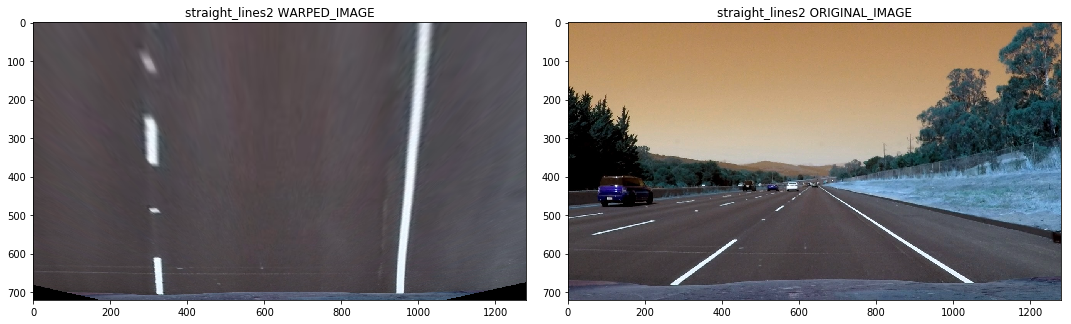

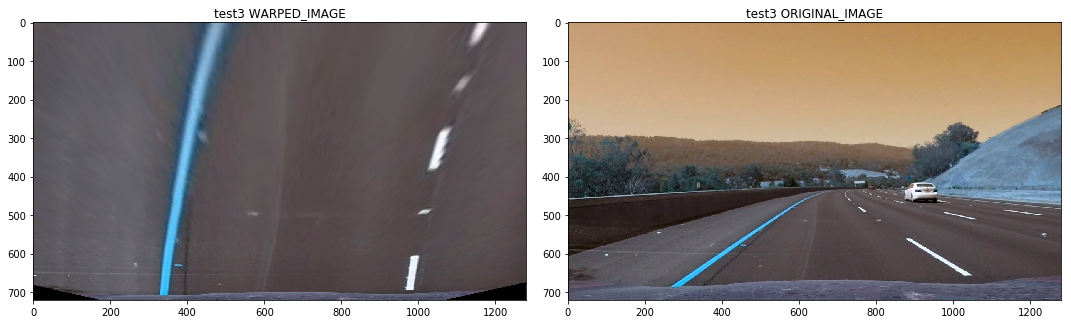

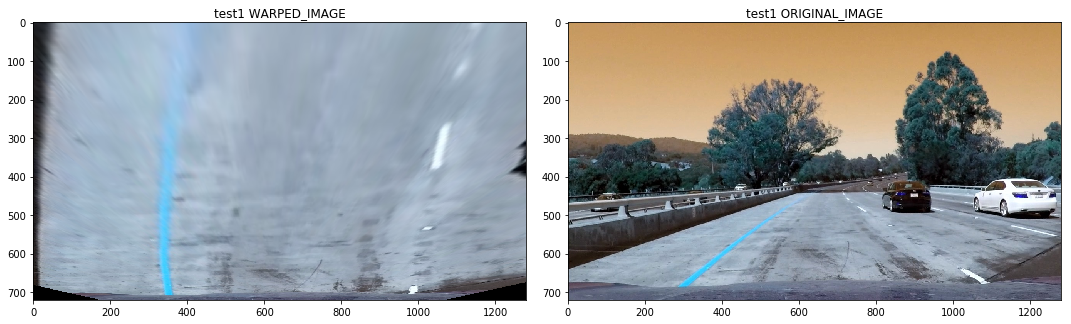

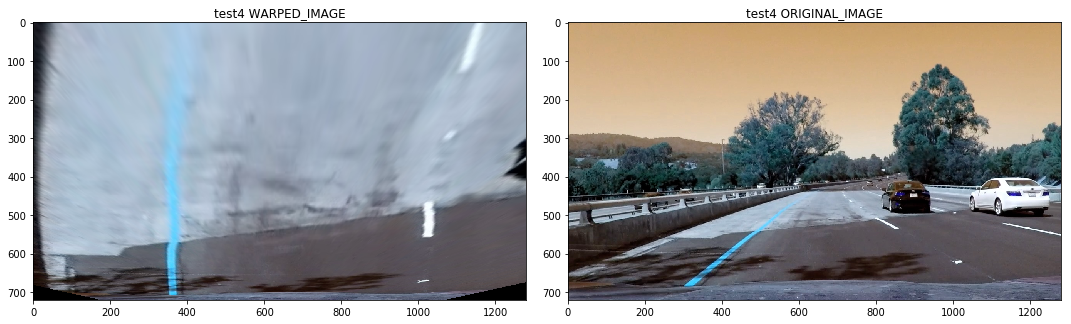

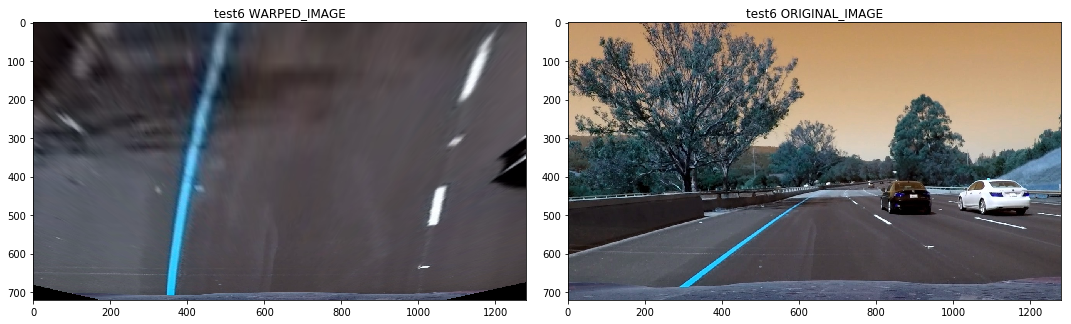

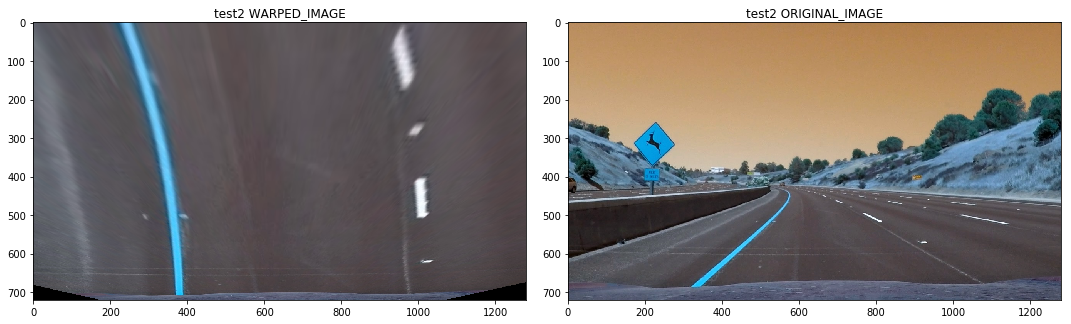

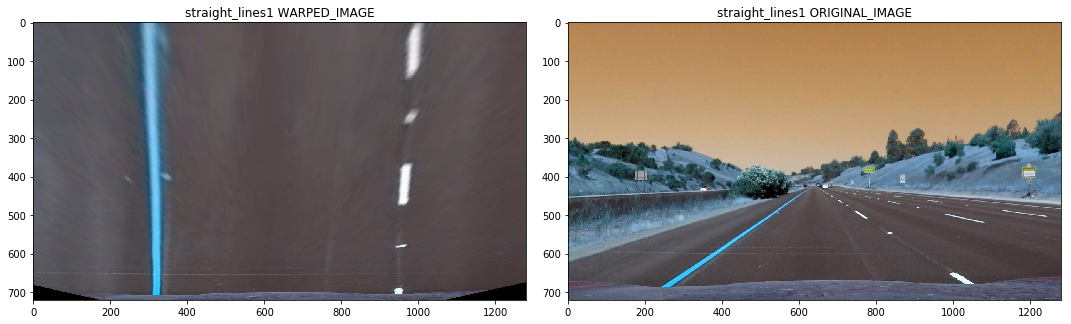

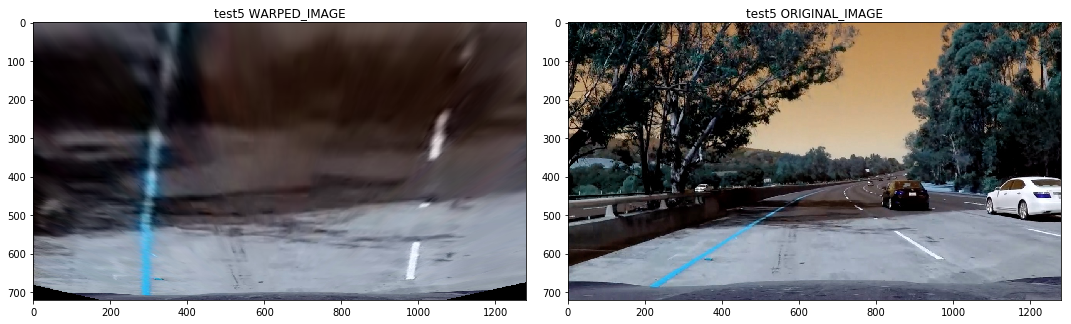

In [18]:
paths = os.getcwd()+'/test_images'
files = os.listdir(paths)

for num, x in enumerate(files):

    image = cv2.imread('./test_images/'+x)
    lane_image = np.copy(image)
    result = warp(lane_image)
    fig, axs = plt.subplots(1, 2, figsize=(15, 20))
    fig.tight_layout()
    axs[0].imshow(result)
    axs[0].set_title(x.split('.')[0]+" WARPED_IMAGE")
    axs[1].imshow(lane_image)
    axs[1].set_title(x.split('.')[0]+" ORIGINAL_IMAGE")